In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures
import warnings
warnings.filterwarnings("ignore")
np.random.seed(42)

In [2]:
df = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep = ';')
y = df.pop('quality')

In [5]:
data = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep = ';')

In [6]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [7]:
data.quality.unique()

array([6, 5, 7, 8, 4, 3, 9])

In [8]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [14]:
data.shape

(4898, 12)

In [15]:
data[data.duplicated()].shape

(937, 12)

In [17]:
data.drop_duplicates(inplace= True)

In [18]:
data.shape

(3961, 12)

In [19]:
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.019214,0.298959,0.083620,0.024036,-0.058396,0.082425,0.266091,-0.431274,-0.017453,-0.110788,-0.124636
volatile acidity,-0.019214,1.000000,-0.163228,0.098340,0.086287,-0.102471,0.102315,0.060603,-0.046954,-0.021150,0.046815,-0.190678
citric acid,0.298959,-0.163228,1.000000,0.106269,0.132590,0.091681,0.122845,0.160076,-0.183015,0.049442,-0.076514,0.007065
residual sugar,0.083620,0.098340,0.106269,1.000000,0.076091,0.306835,0.409583,0.820498,-0.165997,-0.020503,-0.398167,-0.117339
chlorides,0.024036,0.086287,0.132590,0.076091,1.000000,0.101272,0.191145,0.253088,-0.090573,0.017871,-0.356928,-0.217739
free sulfur dioxide,-0.058396,-0.102471,0.091681,0.306835,0.101272,1.000000,0.619437,0.294638,-0.007750,0.037932,-0.251768,0.010507
total sulfur dioxide,0.082425,0.102315,0.122845,0.409583,0.191145,0.619437,1.000000,0.536868,0.008239,0.136544,-0.446643,-0.183356
density,0.266091,0.060603,0.160076,0.820498,0.253088,0.294638,0.536868,1.000000,-0.063734,0.082048,-0.760162,-0.337805
pH,-0.431274,-0.046954,-0.183015,-0.165997,-0.090573,-0.007750,0.008239,-0.063734,1.000000,0.142353,0.093095,0.123829
sulphates,-0.017453,-0.021150,0.049442,-0.020503,0.017871,0.037932,0.136544,0.082048,0.142353,1.000000,-0.022850,0.053200


In [20]:
remove_column = ["citric acid", "sulphates","free sulfur dioxide" ]

In [22]:
data.drop(columns=remove_column, inplace = True)

In [ ]:
#data["quality"] = data["quality"].astype("category")

In [25]:
X = data.drop(columns = "quality")

In [26]:
y = data["quality"]

In [27]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [28]:
knn = KNeighborsClassifier()

In [29]:
knn.fit(train_X,train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [31]:
train_pred = knn.predict(train_X)

In [32]:
from sklearn.metrics import accuracy_score

In [33]:
accuracy_score(train_pred,train_y)

0.6024531024531025

In [34]:
test_pred = knn.predict(test_X)

In [35]:
accuracy_score(test_pred,test_y)

0.45836837678721615

In [64]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [65]:
scale = StandardScaler()
norm  = MinMaxScaler()

In [66]:
X_scaled = scale.fit_transform(X)
X_normalised = norm.fit_transform(X)

In [41]:
def model_fit(model, X, y):
    
    train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state = 1)
    model.fit(train_X,train_y)
    train_pred = model.predict(train_X)
    print("Train Accuracy :",accuracy_score(train_pred,train_y))
    test_pred = model.predict(test_X)
    print("Test Accuracy :", accuracy_score(test_pred,test_y))


In [42]:
model_fit(knn, X, y)

Train Accuracy : 0.6024531024531025
Test Accuracy : 0.45836837678721615


In [62]:
knn = KNeighborsClassifier(n_neighbors=57)

In [63]:
model_fit(knn, X, y)

Train Accuracy : 0.47943722943722944
Test Accuracy : 0.4751892346509672


In [43]:
model_fit(knn, X_scaled, y)

Train Accuracy : 0.6435786435786436
Test Accuracy : 0.5130361648444071


In [67]:
model_fit(knn, X_normalised, y)

Train Accuracy : 0.5580808080808081
Test Accuracy : 0.5441547518923465


In [71]:
knn = KNeighborsClassifier(n_neighbors=30)

In [72]:
model_fit(knn, X_normalised, y)

Train Accuracy : 0.564935064935065
Test Accuracy : 0.5449957947855341


In [68]:

def model_fit_k_optimizer(k, X, y):
    model = KNeighborsClassifier(n_neighbors=k)
    train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state = 1)
    model.fit(train_X,train_y)
    train_pred = model.predict(train_X)
    print("Train Accuracy :",accuracy_score(train_pred,train_y))
    train_acc = accuracy_score(train_pred,train_y)
    test_pred = model.predict(test_X)
    print("Test Accuracy :", accuracy_score(test_pred,test_y))
    test_acc = accuracy_score(test_pred,test_y)
    return train_acc, test_acc

In [48]:
train_acc_list = []
test_acc_list = []
for i in range(1,100,2):
    train_acc, test_acc = model_fit_k_optimizer(i,X_scaled,y)
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)
    
    

Train Accuracy : 1.0
Test Accuracy : 0.47098402018502944
Train Accuracy : 0.715007215007215
Test Accuracy : 0.4861227922624054
Train Accuracy : 0.6435786435786436
Test Accuracy : 0.5130361648444071
Train Accuracy : 0.6277056277056277
Test Accuracy : 0.5189234650967199
Train Accuracy : 0.613997113997114
Test Accuracy : 0.5323801513877208
Train Accuracy : 0.61002886002886
Test Accuracy : 0.5332211942809083
Train Accuracy : 0.5959595959595959
Test Accuracy : 0.5349032800672834
Train Accuracy : 0.5894660894660895
Test Accuracy : 0.5441547518923465
Train Accuracy : 0.5826118326118326
Test Accuracy : 0.5449957947855341
Train Accuracy : 0.5826118326118326
Test Accuracy : 0.543313708999159
Train Accuracy : 0.579004329004329
Test Accuracy : 0.5399495374264087
Train Accuracy : 0.5753968253968254
Test Accuracy : 0.5399495374264087
Train Accuracy : 0.5746753246753247
Test Accuracy : 0.5399495374264087
Train Accuracy : 0.5717893217893217
Test Accuracy : 0.5424726661059714
Train Accuracy : 0.5699855

In [69]:
train_acc_norm_list = []
test_acc_norm_list = []
for i in range(1,100,2):
    train_acc, test_acc = model_fit_k_optimizer(i,X_normalised,y)
    train_acc_norm_list.append(train_acc)
    test_acc_norm_list.append(test_acc)
    

Train Accuracy : 1.0
Test Accuracy : 0.4768713204373423
Train Accuracy : 0.7038239538239538
Test Accuracy : 0.4894869638351556
Train Accuracy : 0.6461038961038961
Test Accuracy : 0.5096719932716569
Train Accuracy : 0.6179653679653679
Test Accuracy : 0.5147182506307821
Train Accuracy : 0.604978354978355
Test Accuracy : 0.528174936921783
Train Accuracy : 0.5963203463203464
Test Accuracy : 0.5256518082422204
Train Accuracy : 0.5898268398268398
Test Accuracy : 0.5349032800672834
Train Accuracy : 0.586940836940837
Test Accuracy : 0.5298570227081582
Train Accuracy : 0.5804473304473304
Test Accuracy : 0.5273338940285954
Train Accuracy : 0.5826118326118326
Test Accuracy : 0.5332211942809083
Train Accuracy : 0.5800865800865801
Test Accuracy : 0.5365853658536586
Train Accuracy : 0.5782828282828283
Test Accuracy : 0.5349032800672834
Train Accuracy : 0.5681818181818182
Test Accuracy : 0.5391084945332212
Train Accuracy : 0.5667388167388168
Test Accuracy : 0.5483599663582843
Train Accuracy : 0.56493

In [56]:
result = pd.DataFrame([np.arange(1,100,2),train_acc_list,test_acc_list]).T

In [57]:
result.columns = ["k" , "Train_Acc", "Test_Acc"]

In [58]:
result.head()

,k,Train_Acc,Test_Acc
0,1.0,1.000000,0.470984
1,3.0,0.715007,0.486123
2,5.0,0.643579,0.513036
3,7.0,0.627706,0.518923
4,9.0,0.613997,0.532380


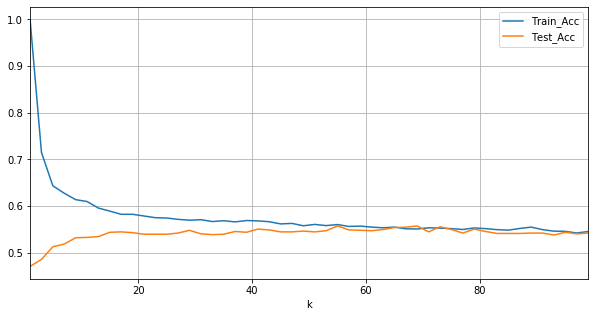

In [59]:
result.plot(x='k', y=['Train_Acc', 'Test_Acc'], figsize=(10,5), grid=True)

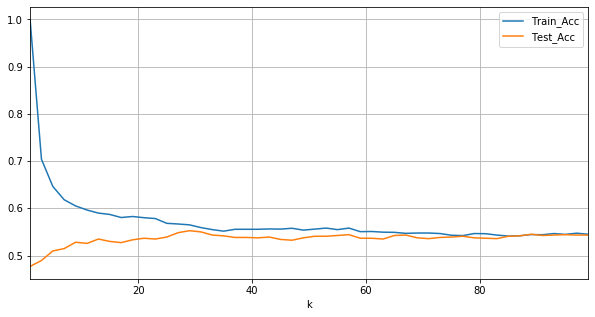

In [70]:
result = pd.DataFrame([np.arange(1,100,2),train_acc_norm_list,test_acc_norm_list]).T

result.columns = ["k" , "Train_Acc", "Test_Acc"]

result.head()

result.plot(x='k', y=['Train_Acc', 'Test_Acc'], figsize=(10,5), grid=True)

In [80]:
def create_poly(train,test,degree):
    poly = PolynomialFeatures(degree=degree)
    train_poly = poly.fit_transform(train)
    test_poly = poly.fit_transform(test)
    return train_poly,test_poly

In [100]:
train_X_poly, test_X_poly = create_poly(train_X, test_X, 3)

In [101]:
knn.fit(train_X_poly,train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=30, p=2,
           weights='uniform')

In [102]:
accuracy_score(train_y, knn.predict(train_X_poly))

0.4797979797979798

In [103]:
accuracy_score(test_y, knn.predict(test_X_poly))

0.46173254835996635

# Naive Bayes

In [73]:
from sklearn.naive_bayes import GaussianNB

In [74]:
nb = GaussianNB()

In [78]:
model_fit(nb, X, y)

Train Accuracy : 0.455988455988456
Test Accuracy : 0.4449116904962153


In [79]:
model_fit(nb, X_normalised, y)

Train Accuracy : 0.4491341991341991
Test Accuracy : 0.43986543313709
